# **Importing the data:**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


**Import the libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
import pathlib


**Read the Absenteesim CSV file using read_csv**

In [ ]:
df = pd.read_csv('/content/gdrive/MyDrive/Absenteeism_Inductions.csv')


**print all the column names and datatype of each column in the dataframe** 

In [ ]:
data_type = df.dtypes
data_type

ID                                      int64
Month of absence                        int64
Day of the week                         int64
Seasons                                object
Transportation expense                  int64
Distance from Residence to College    float64
Weight                                  int64
Height                                  int64
Body mass index                         int64
Absenteeism time in hours               int64
dtype: object

**Print the average height and maximum weight of the students**

In [ ]:
 avg_height = df.Height.mean()
 print("avg height = ", avg_height)
 max_weight = df.Weight.max()
 print("max_height = ", max_weight)

avg height =  172.11486486486487
max_height =  108


**Print the frequency of Absentees in each month** 

In [ ]:
 freq_abs = df['Month of absence'].value_counts()
 freq_abs

3     87
2     72
10    71
7     67
5     64
11    63
8     54
6     54
9     53
4     53
1     50
12    49
0      3
Name: Month of absence, dtype: int64

**Print the days in which no of Absentees exceed 150**

In [ ]:
abd_count_day = df['Day of the week'].value_counts().to_frame()
abd_count_day = abd_count_day.reset_index()
abd_count_day.columns = ['day', 'count']
abd_count_day
abs_150 = abd_count_day.loc[abd_count_day['count'] > 150]
abs_150

,day,count
0,2,161
1,4,156
2,3,154


**Print absentees with more than 10 hrs of absenteeism in december**

In [ ]:
for ind in df.index:
  if(df['Month of absence'][ind])==12 and df['Absenteeism time in hours'][ind]>10:
    print(df['ID'][ind])

34
34
3
22
14


**Print the number of missing values in each column**

In [ ]:
df.isna().sum()

ID                                     0
Month of absence                       0
Day of the week                        0
Seasons                                0
Transportation expense                 0
Distance from Residence to College    54
Weight                                 0
Height                                 0
Body mass index                        0
Absenteeism time in hours              0
dtype: int64

**Fill the missing values using the SimpleImputer() method**

In [ ]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean', missing_values=np.nan)
imputer = imputer.fit(df[['Distance from Residence to College']])
df['Distance from Residence to College'] = imputer.transform(df[['Distance from Residence to College']])
df

imputer = SimpleImputer(strategy='mean', missing_values=np.nan)
imputer = imputer.fit(df[['Distance from Residence to College']])

df['Distance from Residence to College'] = imputer.transform(df[['Distance from Residence to College']])



**Convert Seasonal column to Categorical data**
**Assign 1-Spring**
       **2-Summer**
       **3-Autumn**
       **4-Winter**

In [1]:
from collections import Counter

season_dict = {'Spring': '1',
               'Summer': '2',
               'Autumn': '3', 
               'Winter': '4'}

df['Seasons'].replace(['Spring', 'Summer', 'Autumn', 'Winter'],
                        [1, 2, 3, 4], inplace=True)


df['Seasons']

NameError: ignored

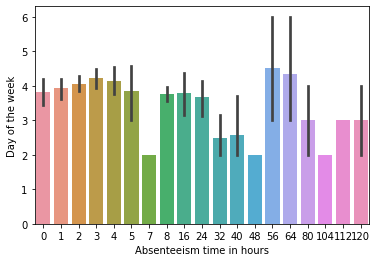

In [ ]:
sns.barplot(data = df, x= 'Absenteeism time in hours', y= 'Day of the week')

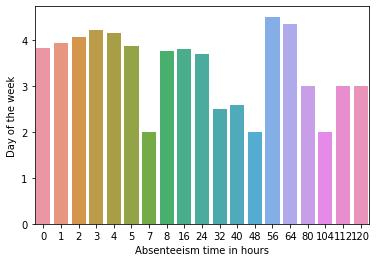

In [ ]:
sns.barplot(data = df, x= 'Absenteeism time in hours', y= 'Day of the week', ci=None)

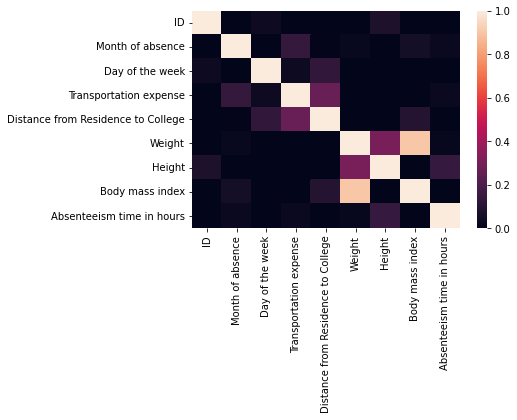

In [ ]:
dfna = df.drop(['Seasons'], axis=1)
hm = sns.heatmap(data = dfna.corr(), vmin = 0, vmax = 1)

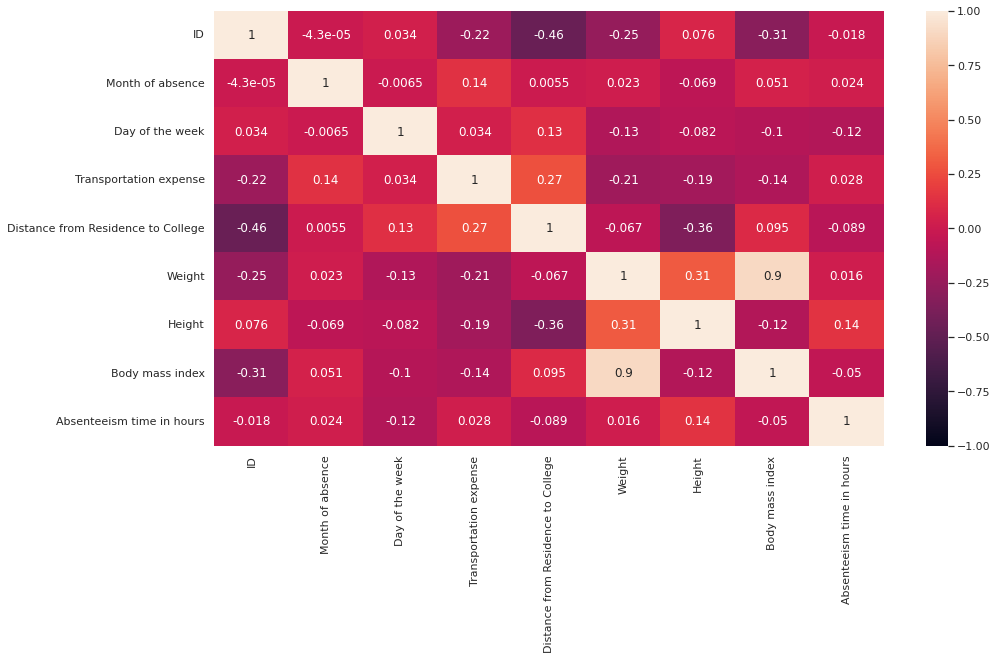

In [ ]:
sns.set(rc = {'figure.figsize':(15,8)})
hn = sns.heatmap(data = dfna.corr(), vmin = -1, vmax = 1, annot=True)

In [ ]:
dfnb = dfna.drop(['Weight'], axis=1)

In [ ]:
X = dfnb.iloc[:, :-1].values
print(X)

[[ 11.   7.   3. ...  36. 172.  30.]
 [ 36.   7.   3. ...  13. 178.  31.]
 [  3.   7.   4. ...  51. 170.  31.]
 ...
 [  4.   0.   3. ...  14. 170.  34.]
 [  8.   0.   4. ...  35. 170.  35.]
 [ 35.   0.   6. ...  45. 175.  25.]]


In [ ]:
y = dfnb.iloc[:, -1].values
print(y) 

[  4   0   2   4   2   2   8   4  40   8   8   8   8   1   4   8   2   8
   8   2   8   1  40   4   8   7   1   4   8   2   8   8   4   8   2   1
   8   4   8   4   2   4   4   8   2   3   3   4   8  32   0   0   2   2
   0   0   3   3   0   1   3   4   3   3   0   1   3   3   3   2   2   5
   8   3  16   8   2   8   1   3   1   1   8   8   5  32   8  40   1   8
   3   8   3   4   1   3  24   3   1  64   2   8   2   8  56   8   3   3
   2   8   2   8   2   1   1   1   8   2   2   2   1   2   2   2   2   2
   2   2   2   8   8   2   2   2   0   1   3   1   8   8   2   8   2   8
   8   8   2   2   1   8   3   8   1   1   8   2   8   3   8   8   8   8
   3  40  40  16  16   8   8   8   4   1   8  24   2   8   1   8  16   3
  16   2   3   1   1   1   1  24   1   2   4  24   1   3   8   1   8  56
   8  24   8  16   3   0   8   2   1   8   8   4   2   1  24   0   0   0
   0   1  24   8   8   8  24   4   8   8   4   8   8  16   1  80   8   2
   2   2  16   8   8   4   8   8   2   8   8   3   

In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
 
X = dfna.iloc[:, :-1]
y = dfna.iloc[:, -1]
 
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=0)

In [ ]:
from sklearn.linear_model import LinearRegression
clf = LinearRegression()

clf.fit(X_train,y_train)




LinearRegression()

In [ ]:
y_pred= clf.predict(X_test)
y_pred

array([-1.4382728 ,  6.97825131,  5.1025104 ,  2.74770227,  4.91489334,
        6.01483289,  5.90569029,  6.80206785,  7.10179453, 10.19856827,
        6.80200771,  9.21499911,  8.0562645 , 11.12166994,  4.55172742,
        2.52732308,  4.41041788,  4.142041  ,  4.289947  ,  3.15732751,
        5.22005419,  4.23248655,  2.97732624, -1.25993279,  6.741792  ,
       11.75167437,  6.69989884, 14.49768829,  8.5297324 ,  5.87541641,
       18.02691109,  5.46938876,  7.67528198,  8.5297324 ,  7.51626071,
        8.02872134, 12.35449048,  6.09939318,  9.21104573,  5.99353781,
        4.21581312,  7.87626324,  7.1887945 ,  8.46974559,  3.2794024 ,
        6.11561271,  6.65179136,  6.24201774,  4.19308058, 18.38691362,
        9.67839124,  7.29123763,  8.44301803,  6.83561777,  7.75616173,
       10.35446541,  8.21559843,  7.60626134,  8.82526768,  1.9962982 ,
        8.66560159,  8.79300873, 11.05180874,  2.80630389,  5.31891607,
        5.6356884 ,  5.09173122,  4.77005103, 16.11380246,  2.53

In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)


-0.0055293219119052495